**Employee Performance Prediction**

**Problem Statement.**

Build a model to predict performance of employees, based on the visualisation and analysis of past data of employee performance.

**Objectives.**

Importing necessary Modules

Import the modules necessary for Data Manipulation and Visualization.
Reading dataset

Read the dataset containing loan applicant information.

Task 1 - Exploring the Dataset

Understand the Structure and various data types of the attributes within the dataset.

Task 2 - Cleaning the dataset

Identify and analyze missing values in the dataset.

Task 3 - EDA Analysis

Conduct EDA to explore the visualisations of individual variables.

**Exploring the DataSet**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
file = ('/content/drive/MyDrive/Colab Notebooks/TeachForIndia/Test_data.csv')
df = pd.read_csv(file)


In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [6]:
df.shape

(23490, 13)

In [7]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [9]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


**Data Cleaning**

In [10]:
#Testing the null value count
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [11]:
#Finding the most common value
print(df["education"].mode())
print(df["previous_year_rating"].mode())

0    Bachelor's
Name: education, dtype: object
0    3.0
Name: previous_year_rating, dtype: float64


In [12]:
#Finding Unique Values
df.nunique()

,0
employee_id,23490
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,9
age,41
previous_year_rating,5
length_of_service,34


In [13]:
df = df.drop('employee_id', axis=1)

In [14]:
#Testing for any Duplicate Values
df.duplicated().sum()

np.int64(26)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
# Checking the percentage of null values for columns

100*(df.isna().mean()).sort_values(ascending=False)

,0
previous_year_rating,7.658541
education,4.389703
region,0.000000
department,0.000000
gender,0.000000
recruitment_channel,0.000000
no_of_trainings,0.000000
age,0.000000
length_of_service,0.000000
KPIs_met >80%,0.000000


In [18]:
# Education and Previous_year_rating have missing values to be imputed with mode and median

df['education'].fillna(df['education'].mode()[0], inplace=True)

In [19]:
df['previous_year_rating'].unique()

array([nan,  3.,  1.,  2.,  4.,  5.])

In [20]:
num_cols = ['previous_year_rating']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [21]:
print(df.isnull().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64


In [22]:
#check for columns with one unique value, count and freq is same

df.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,23464,23464,23464,23464,23464
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,7304,5290,16589,16574,13064


In [23]:
# Encode: 'm' = 0, 'f' = 1
df['gender'] = df['gender'].map({'m': 0, 'f': 1})

# Output the cleaned and encoded data
print(df)

              department     region         education  gender  \
0             Technology  region_26        Bachelor's       0   
1                     HR   region_4        Bachelor's       1   
2      Sales & Marketing  region_13        Bachelor's       0   
3            Procurement   region_2        Bachelor's       1   
4                Finance  region_29        Bachelor's       0   
...                  ...        ...               ...     ...   
23485              Legal   region_2   Below Secondary       0   
23486         Technology  region_25        Bachelor's       0   
23487                 HR  region_16        Bachelor's       1   
23488        Procurement  region_31        Bachelor's       0   
23489         Technology  region_17  Master's & above       0   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   24                   3.0   
1                   other                1   31                   3.0   


In [24]:
print(df['gender'].value_counts())
df['gender'].value_counts(normalize=True) * 100  # Percentage
imbalance_ratio = (df['gender'] == 0).sum() / (df['gender'] == 1).sum()
imbalance_ratio

gender
0    16574
1     6890
Name: count, dtype: int64


np.float64(2.4055152394775035)

**Exploratory Data Analysis**

**Univariate Analysis**

In [25]:
df[['gender', 'department', 'region', 'recruitment_channel']].value_counts()

gender  department         region     recruitment_channel
0       Sales & Marketing  region_2   other                  494
                                      sourcing               376
                           region_7   other                  267
1       Procurement        region_2   other                  251
0       Sales & Marketing  region_22  other                  244
                                                            ... 
1       Sales & Marketing  region_3   sourcing                 1
        HR                 region_4   sourcing                 1
        Analytics          region_13  other                    1
0       HR                 region_24  sourcing                 1
                                      other                    1
Name: count, Length: 953, dtype: int64

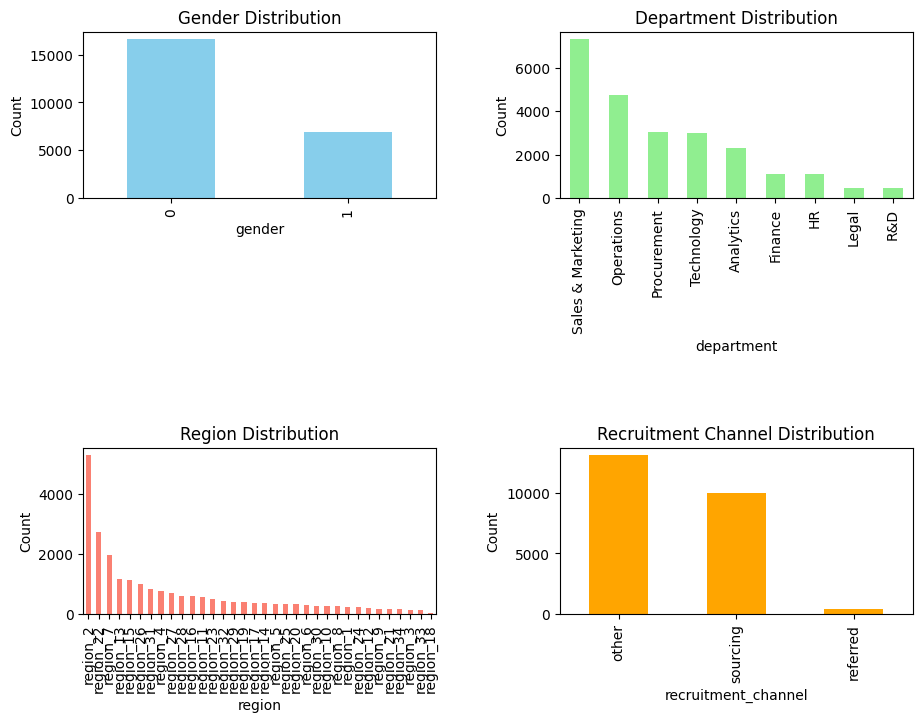

In [26]:
# Create a DataFrame
df1 = pd.DataFrame(df)

# List of columns to plot and their titles
columns = ['gender', 'department', 'region', 'recruitment_channel']
titles = ['Gender Distribution', 'Department Distribution',
          'Region Distribution', 'Recruitment Channel Distribution']
colors = ['skyblue', 'lightgreen', 'salmon', 'orange']

# Create a figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# Loop through each column and plot
for i, col in enumerate(columns):
    df1[col].value_counts().plot.bar(ax=axes[i], color=colors[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout(pad=3.5)
plt.subplots_adjust(hspace=1.5)
plt.show()

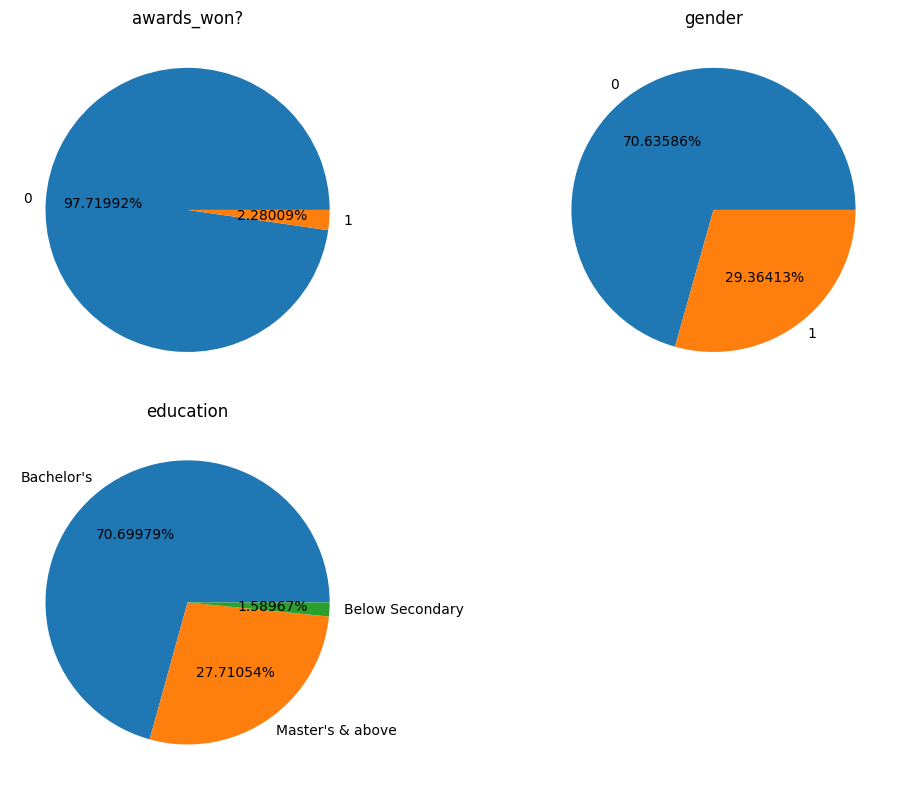

In [27]:
# Pie plots for columns
columns_plotting = ['awards_won?', 'gender', 'education']

# Determine subplot grid size
charts_number = len(columns_plotting)
cols = 2
rows = (charts_number + cols - 1) // cols

# Create subplots with exact number of axes
fig, axes = plt.subplots(rows, cols, figsize=(10, 8))

# Flatten axes only if more than 1 subplot, else keep as list
if charts_number == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Create each pie chart
for i, column in enumerate(columns_plotting):
    counts = df[column].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.5f%%', startangle=0)
    axes[i].set_title(column)

# Remove extra axes (if any were created due to rounding up)
for ax in axes[charts_number:]:
    ax.remove()

plt.tight_layout()
plt.show()

In [28]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

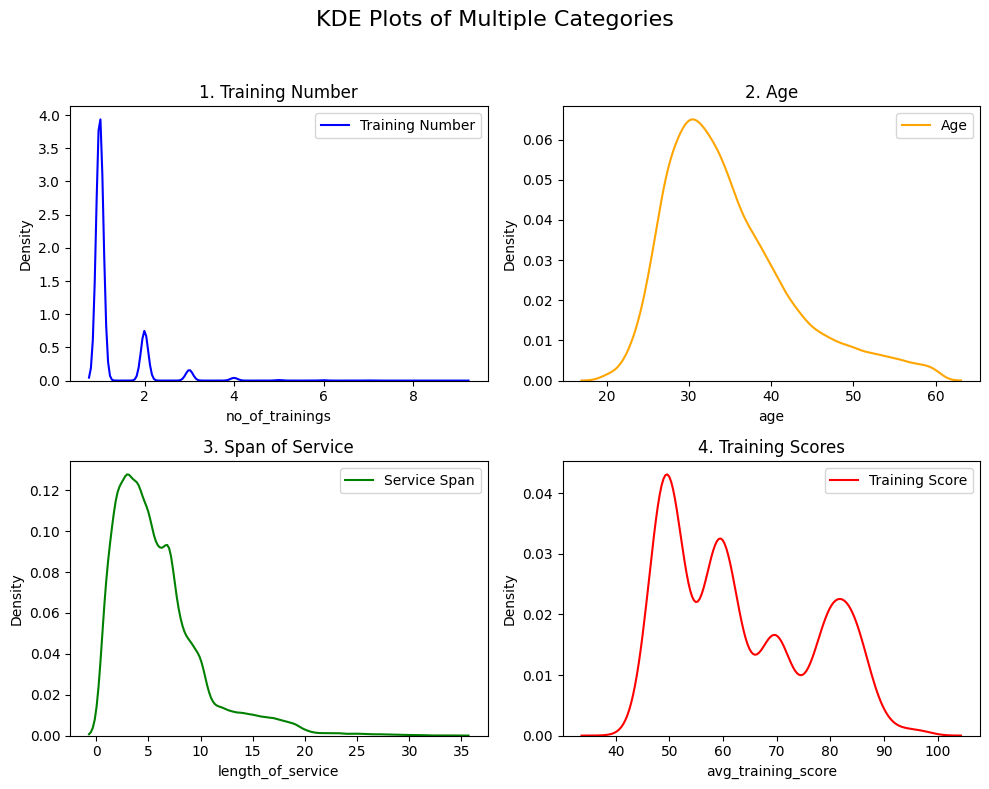

In [29]:
# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Titles for each subplot
# Plot KDE for each category in its respective subplot
sns.kdeplot(df['no_of_trainings'], ax=axes[0, 0], color='blue', label='Training Number')
axes[0, 0].set_title('1. Training Number')
axes[0, 0].legend()

sns.kdeplot(df['age'], ax=axes[0, 1], color='orange', label='Age')
axes[0, 1].set_title('2. Age')
axes[0, 1].legend()

sns.kdeplot(df['length_of_service'], ax=axes[1, 0], color='green', label='Service Span')
axes[1, 0].set_title('3. Span of Service')
axes[1, 0].legend()

sns.kdeplot(df['avg_training_score'], ax=axes[1, 1], color='red', label='Training Score')
axes[1, 1].set_title('4. Training Scores')
axes[1, 1].legend()

# Adjust spacing and add overall title
fig.suptitle('KDE Plots of Multiple Categories', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

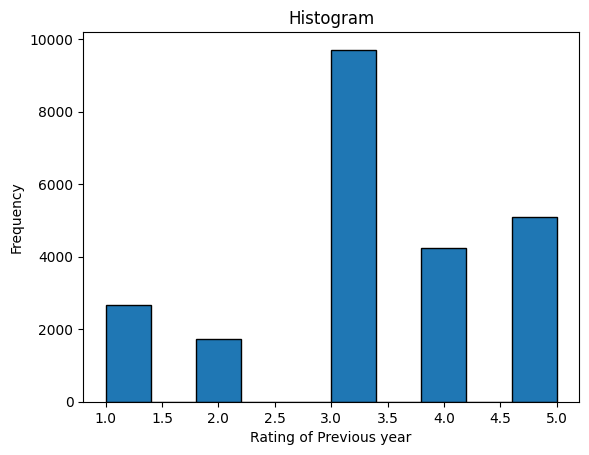

In [30]:
# Plotting the histogram for previous year rating
plt.hist(df['previous_year_rating'], bins=10, edgecolor='black')  # bins specify the number of intervals
plt.title('Histogram')
plt.xlabel('Rating of Previous year')
plt.ylabel('Frequency')

# Show the plot
plt.show()

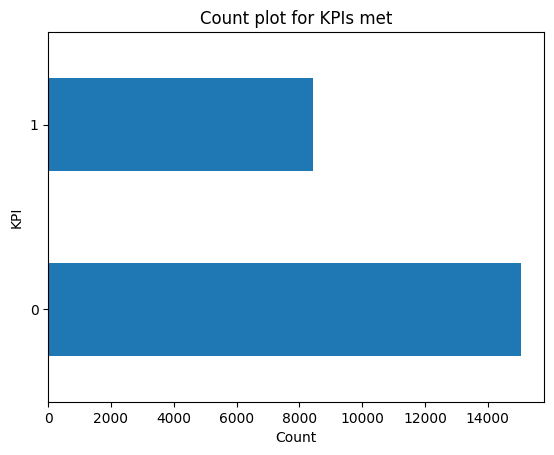

In [31]:
#Count plot for the KPI.
df['KPIs_met >80%'].value_counts().plot(kind = 'barh')

# Add label for the x-axis
plt.xlabel('Count')
# Add label for the y-axis
plt.ylabel('KPI')
plt.title('Count plot for KPIs met')  # Add a title
plt.show()

**Bivariate Analysis**

In [32]:
df[['gender', 'avg_training_score']].head()

,gender,avg_training_score
0,0,77
1,1,51
2,0,47
3,1,65
4,0,61


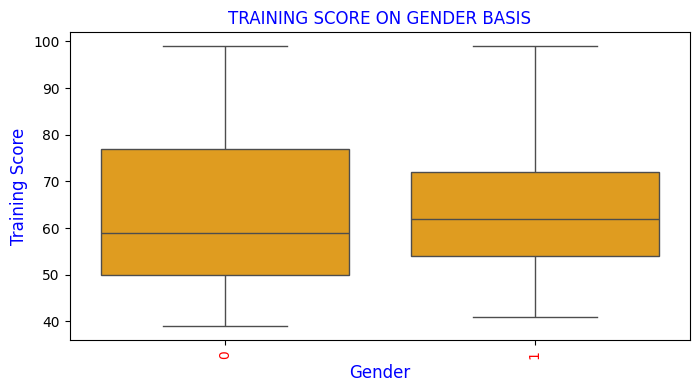

In [33]:
# Training Score as per Gender
plt.figure(figsize=(8, 4))
sns.boxplot(data = df[['gender', 'avg_training_score']], x = 'gender', y = 'avg_training_score', color = 'orange')
plt.title('Training Score on Gender basis'.upper(), color = 'b', fontsize = 12)
plt.xlabel('Gender', fontsize = 12, color = 'b')
plt.ylabel('Training Score', fontsize = 12, color = 'b')
plt.xticks(rotation = 90, color = 'r')
plt.show()

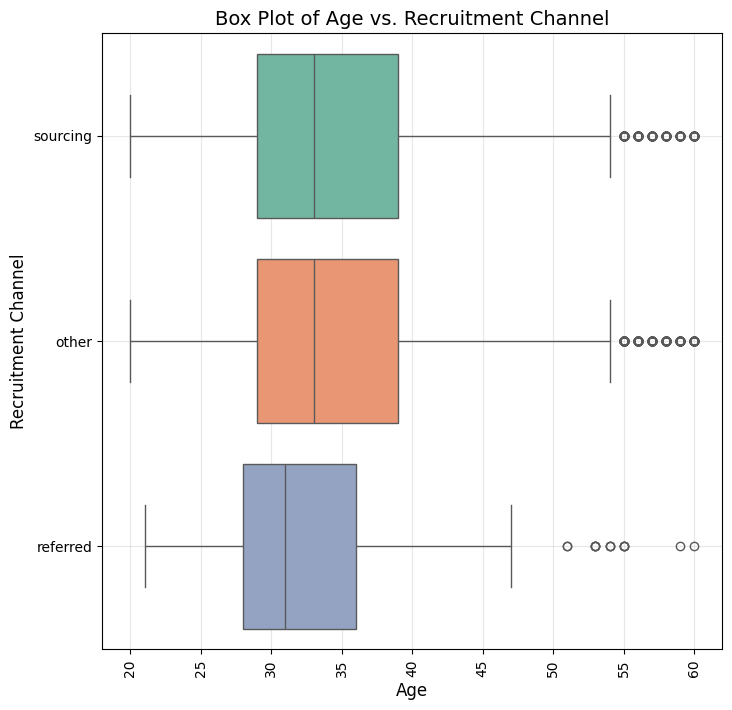

In [34]:
# Create the Box plot
plt.figure(figsize=(8, 8))
X = df['recruitment_channel']
Y= df['age']

sns.boxplot(x=Y,
    y=X,
    hue = X,
    palette='Set2',
    legend = False)


# Customizing the plot
plt.title('Box Plot of Age vs. Recruitment Channel', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('Recruitment Channel', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

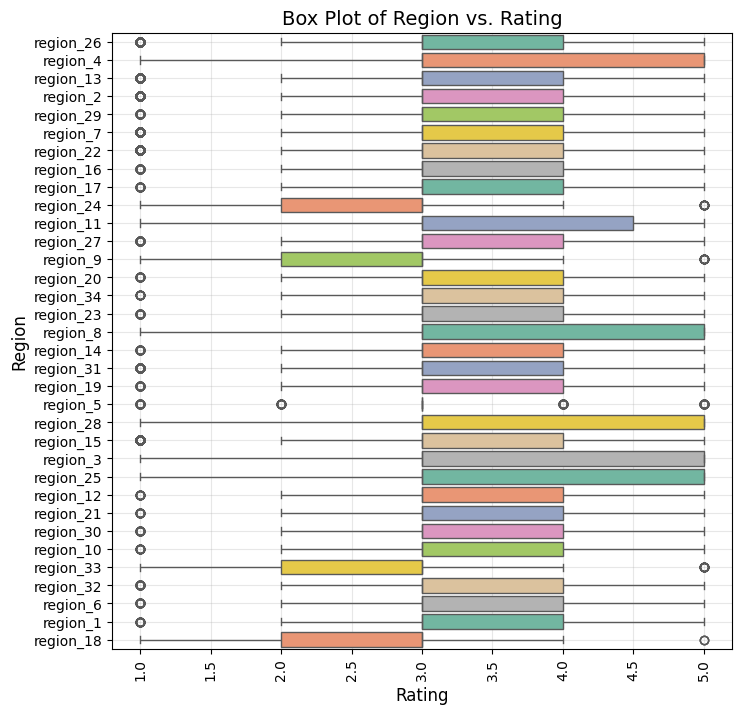

In [35]:
# Create the Box plot of ratings as per region
plt.figure(figsize=(8, 8))
X = df['region']
Y= df['previous_year_rating']

sns.boxplot(x=Y,
    y=X,
    hue = X,
    palette='Set2',
    legend = False)


# Customizing the plot
plt.title('Box Plot of Region vs. Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('Region', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

In [36]:
df['department'].unique()
df['department'].value_counts()

,count
department,
Sales & Marketing,7304
Operations,4760
Procurement,3018
Technology,3010
Analytics,2312
Finance,1091
HR,1084
Legal,445
R&D,440


In [37]:
df[['department', 'avg_training_score']].value_counts().head()

department         avg_training_score
Sales & Marketing  50                    1066
                   49                    1000
                   48                     938
                   51                     875
                   47                     693
Name: count, dtype: int64

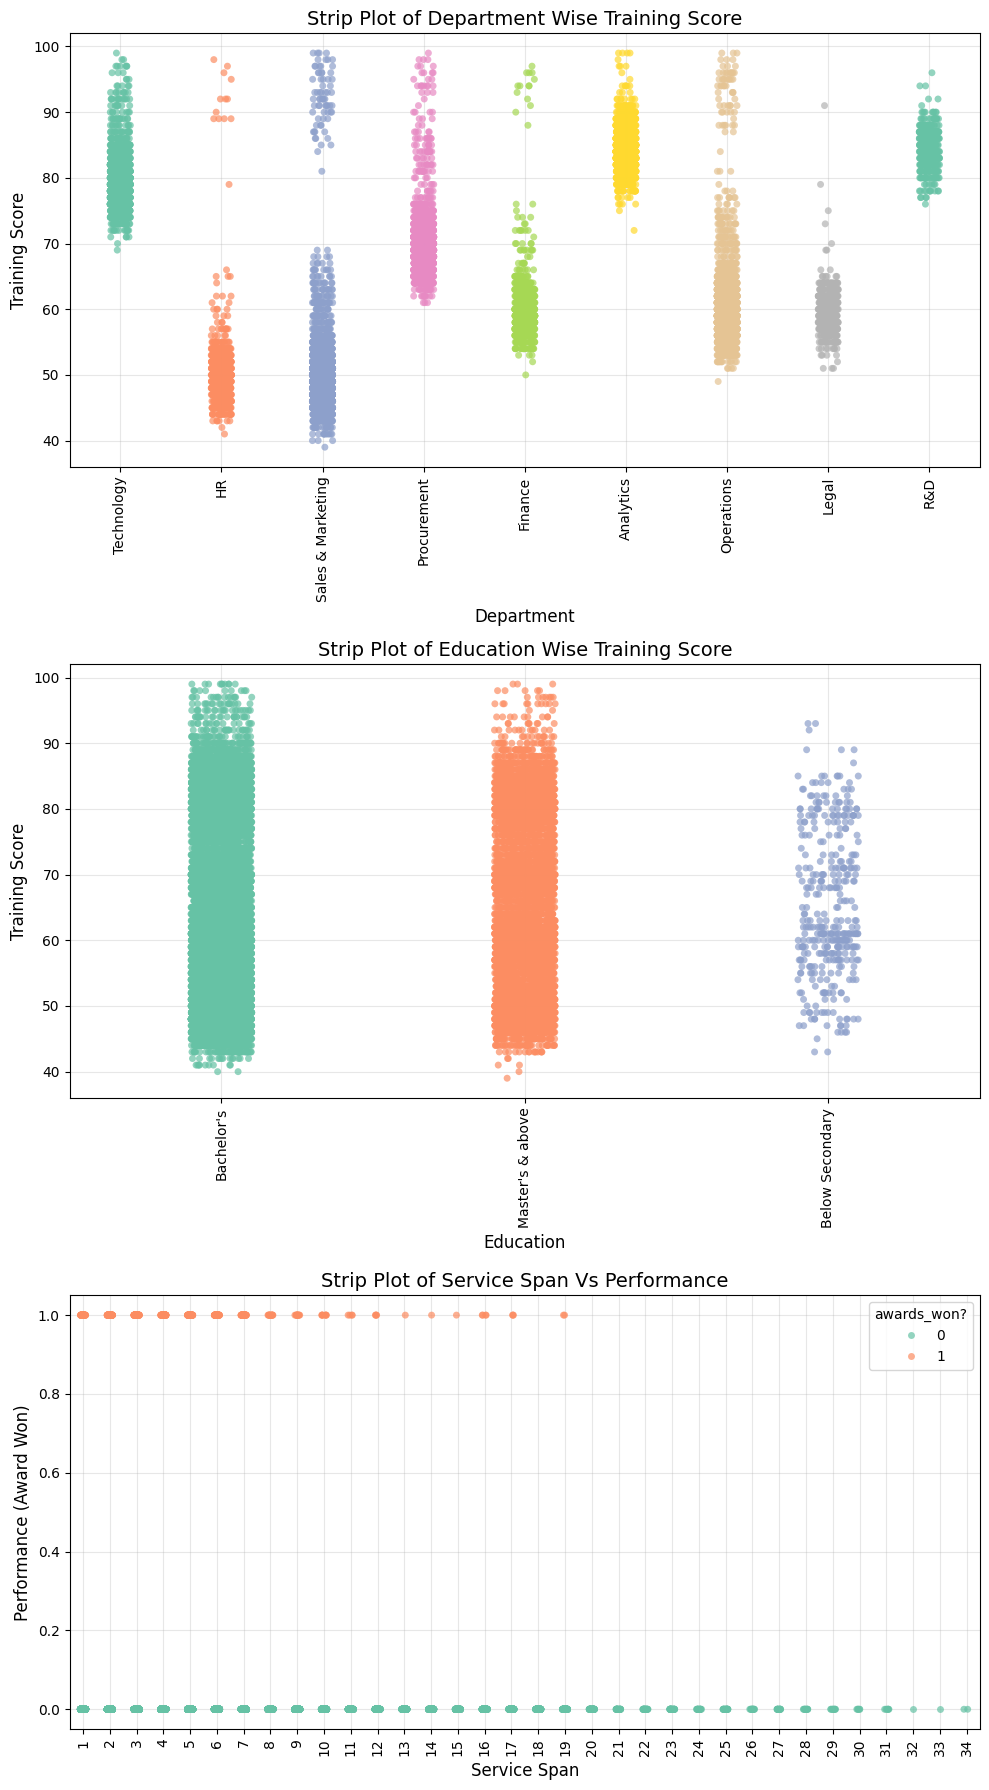

In [38]:
#Plotting Strip Plots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))  # 3 rows, 1 column

# Plot 1: Department vs Training Score
sns.stripplot(
    data=df,
    x='department',
    y='avg_training_score',
    hue='department',
    palette='Set2',
    alpha=0.7,
    ax=axes[0])

axes[0].set_title('Strip Plot of Department Wise Training Score', fontsize=14)
axes[0].set_xlabel('Department', fontsize=12)
axes[0].set_ylabel('Training Score', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(alpha=0.3)


# Plot 2: Education vs Training Score
sns.stripplot(
    data=df,
    x='education',
    y='avg_training_score',
    hue='education',
    palette='Set2',
    alpha=0.7,
    ax=axes[1])

axes[1].set_title('Strip Plot of Education Wise Training Score', fontsize=14)
axes[1].set_xlabel('Education', fontsize=12)
axes[1].set_ylabel('Training Score', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(alpha=0.3)


# Plot 3: Length of Service vs Awards Won
sns.stripplot(
    data=df,
    x='length_of_service',
    y='awards_won?',
    hue='awards_won?',
    palette='Set2',
    alpha=0.7,
    ax=axes[2])

axes[2].set_title('Strip Plot of Service Span Vs Performance', fontsize=14)
axes[2].set_xlabel('Service Span', fontsize=12)
axes[2].set_ylabel('Performance (Award Won)', fontsize=12)
axes[2].tick_params(axis='x', rotation=90)
axes[2].grid(alpha=0.3)


plt.tight_layout()
plt.show()

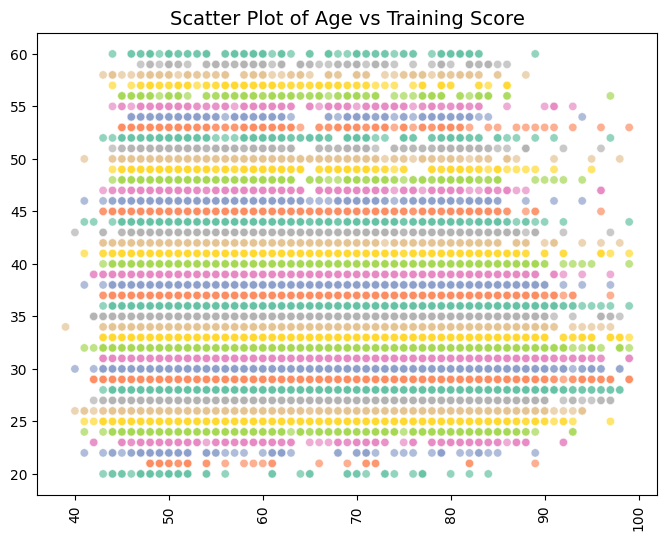

In [39]:
# Create the scatter plot
X = df['age']
Y= df['avg_training_score']
plt.figure(figsize=(8, 6), alpha = 0.7)
sns.scatterplot(x=Y,
    y=X,
    hue = X,
    palette='Set2',
    alpha=0.7, legend = False)


# Customizing the plot
plt.title('Scatter Plot of Age vs Training Score', fontsize=14)
plt.xlabel('', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('', fontsize=12)


plt.show()

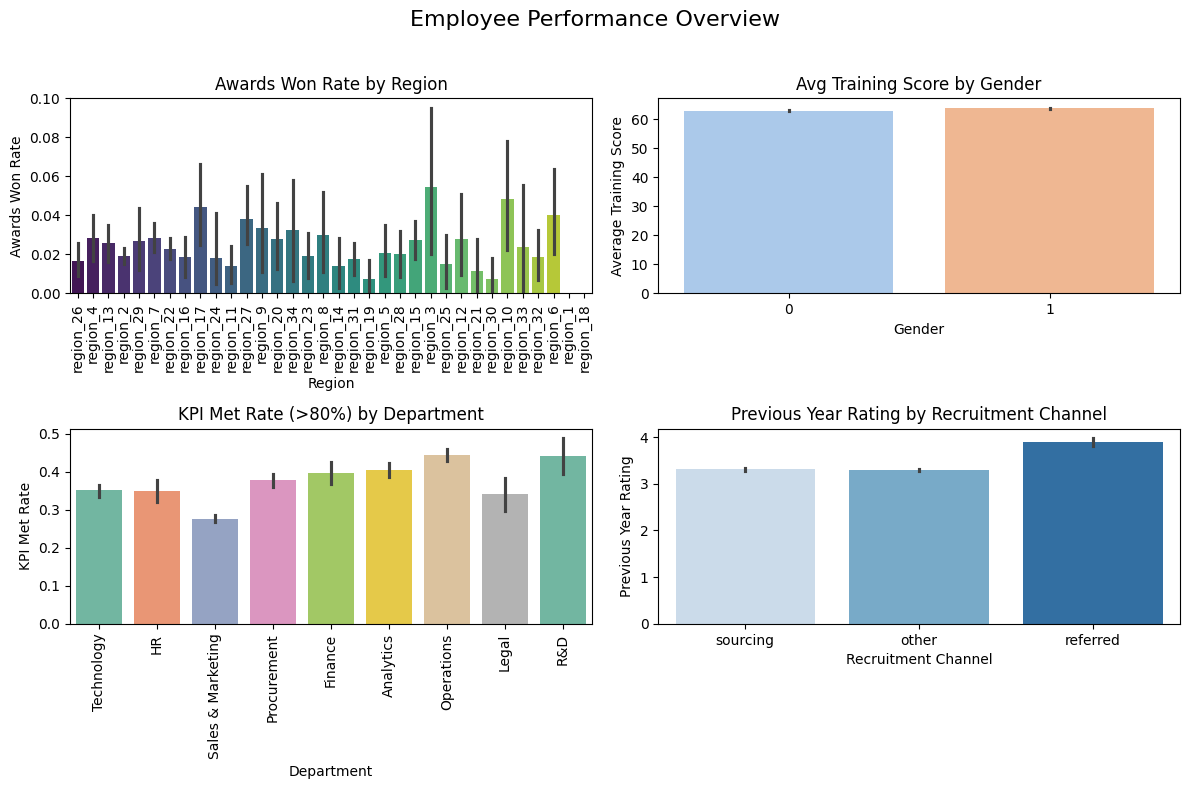

In [40]:
#Bar Plots for different columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=100)  # 2 rows, 2 columns
fig.suptitle('Employee Performance Overview', fontsize=16)

# 1. Region vs Awards Won
sns.barplot(data=df, x='region', y='awards_won?', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Awards Won Rate by Region')
axes[0, 0].set_xlabel('Region')
axes[0, 0].set_ylabel('Awards Won Rate')
axes[0, 0].tick_params(axis='x', rotation=90)

# 2. Gender vs Avg Training Score
sns.barplot(data=df, x='gender', y='avg_training_score', palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title('Avg Training Score by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Average Training Score')

# 3. Department vs KPI Met Rate
sns.barplot(data=df, x='department', y='KPIs_met >80%', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('KPI Met Rate (>80%) by Department')
axes[1, 0].set_xlabel('Department')
axes[1, 0].set_ylabel('KPI Met Rate')
axes[1, 0].tick_params(axis='x', rotation=90)

# 4. Recruitment Channel vs Previous Year Rating
sns.barplot(data=df, x='recruitment_channel', y='previous_year_rating', palette='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Previous Year Rating by Recruitment Channel')
axes[1, 1].set_xlabel('Recruitment Channel')
axes[1, 1].set_ylabel('Previous Year Rating')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

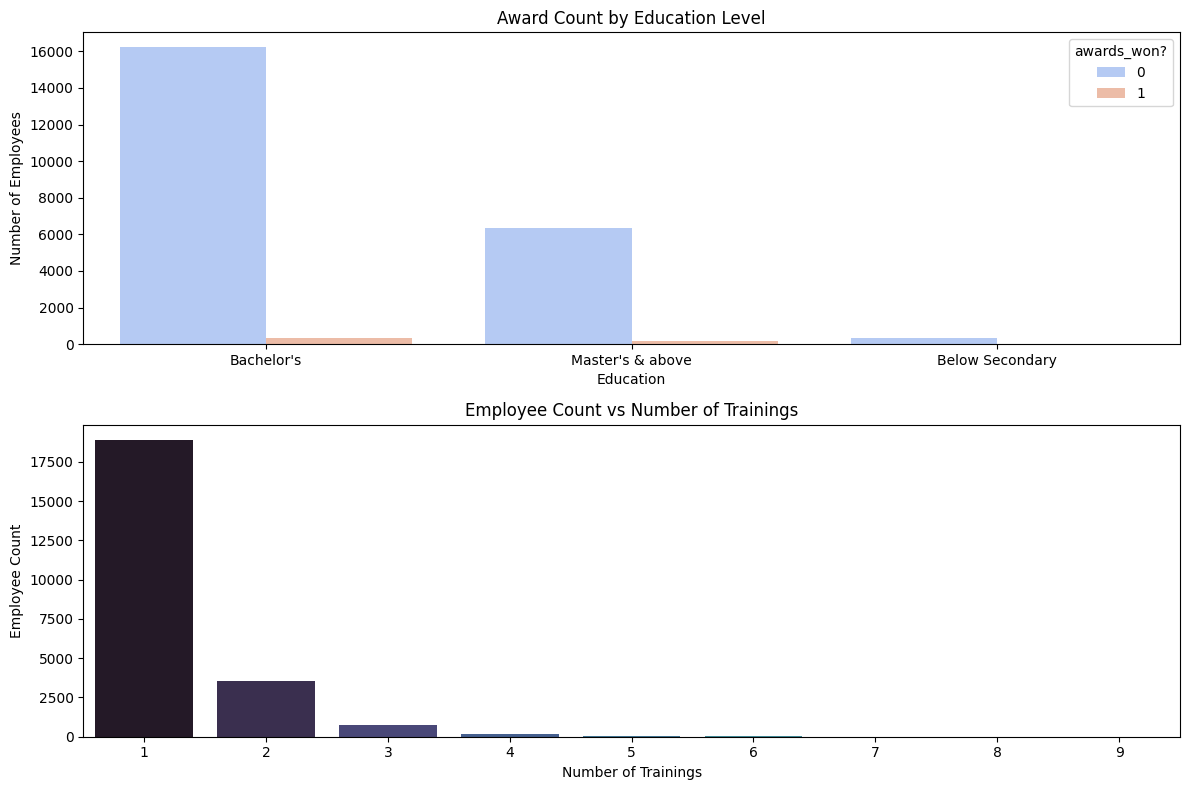

In [41]:
#Plotting of Count Plots
# Create 1 row with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(12,8))  # Width and height in inches

# --- Subplot 1: Education vs Awards Won ---
sns.countplot(data=df, x='education', hue='awards_won?', palette='coolwarm', ax=axes[0])
axes[0].set_title('Award Count by Education Level')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Number of Employees')
axes[0].tick_params(axis='x', rotation=0)

# --- Subplot 2: No. of Trainings ---
sns.countplot(data=df, x='no_of_trainings', palette='mako', ax=axes[1])
axes[1].set_title('Employee Count vs Number of Trainings')
axes[1].set_xlabel('Number of Trainings')
axes[1].set_ylabel('Employee Count')

# Final layout adjustment
plt.tight_layout()
plt.show()

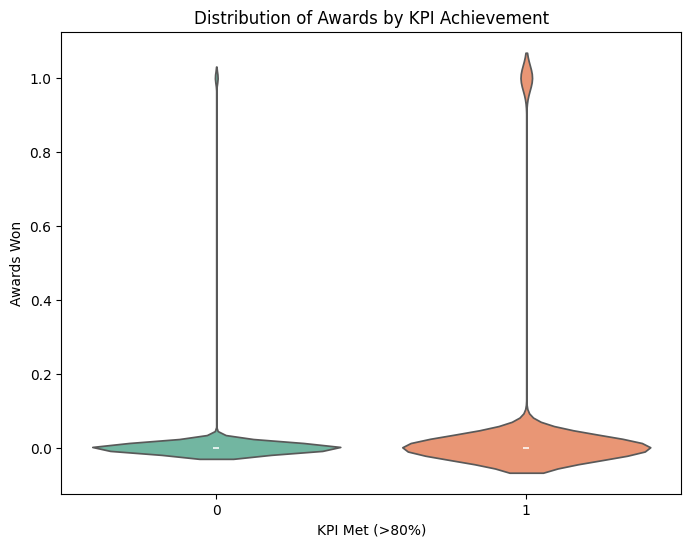

In [42]:
# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='KPIs_met >80%',
    y='awards_won?',
    data=df,
    inner='box',
    palette='Set2'
)

plt.title('Distribution of Awards by KPI Achievement')
plt.xlabel('KPI Met (>80%)')
plt.ylabel('Awards Won')
plt.show()

**Multivariate Analysis**

In [43]:
df.select_dtypes(include=['int64','float64']).columns

Index(['gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

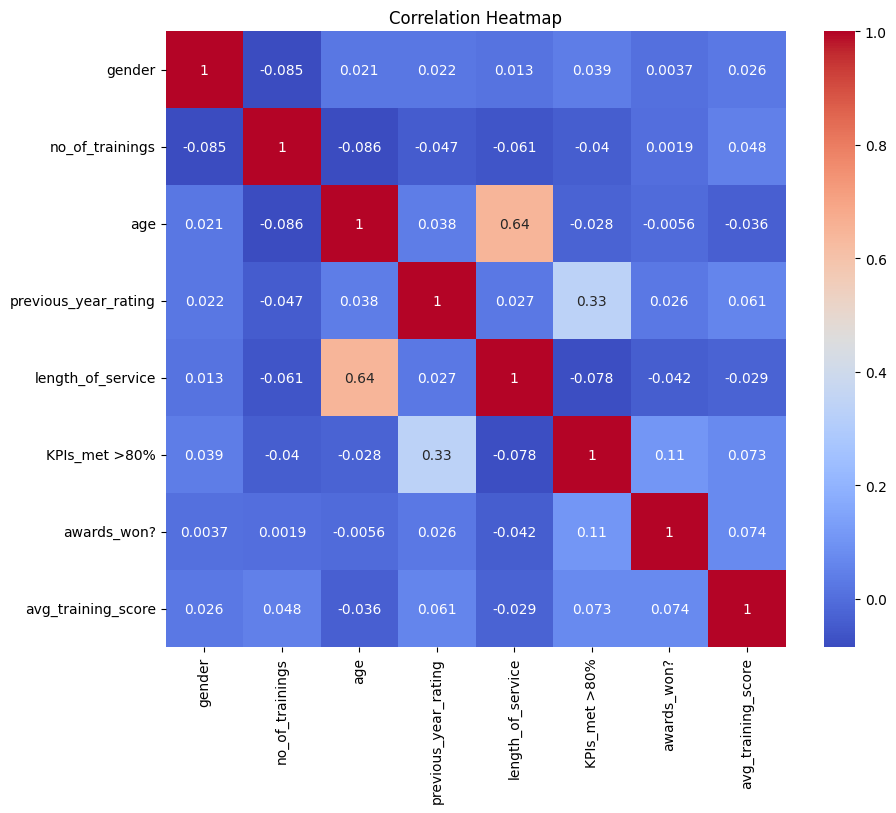

In [44]:
#Heat Map plotting
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

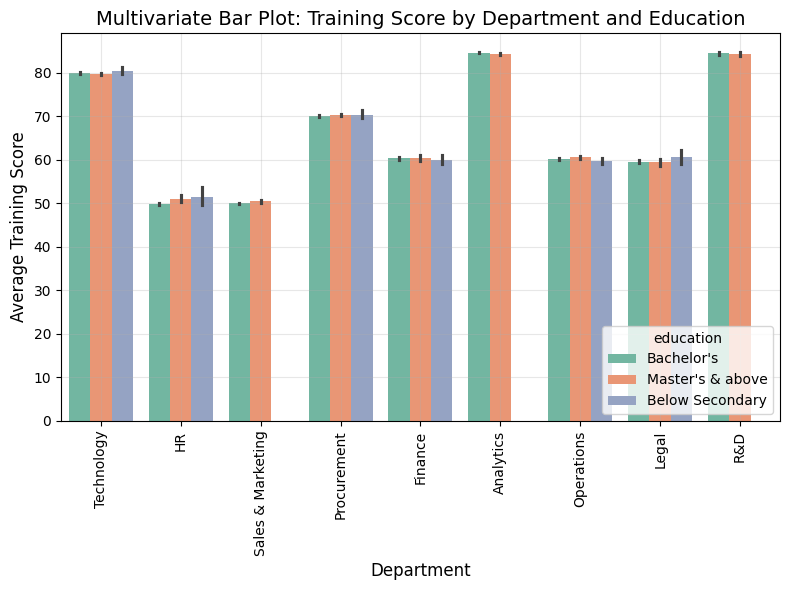

In [45]:
#Stacked Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df,
    x='department',
    y='avg_training_score',
    hue='education',  # Second categorical variable
    palette='Set2'
)

plt.title('Multivariate Bar Plot: Training Score by Department and Education', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Training Score', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

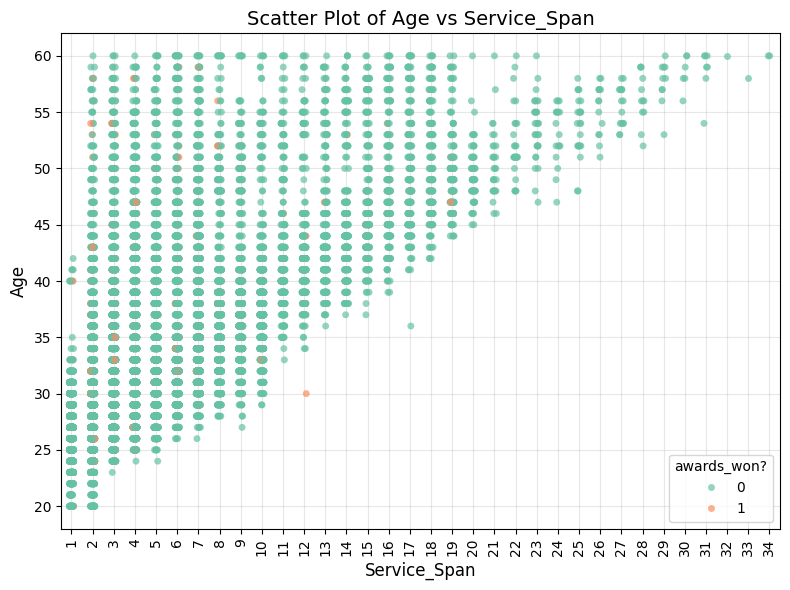

In [46]:
#Scatter Plot
plt.figure(figsize=(8, 6))
sns.stripplot(
    data=df,
    x='length_of_service',
    y='age',
    hue='awards_won?',
    palette='Set2',
    alpha=0.7) # To better distinguish overlapping points


# Customizing the plot
plt.title('Scatter Plot of Age vs Service_Span', fontsize=14)
plt.xlabel('Service_Span', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('Age', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

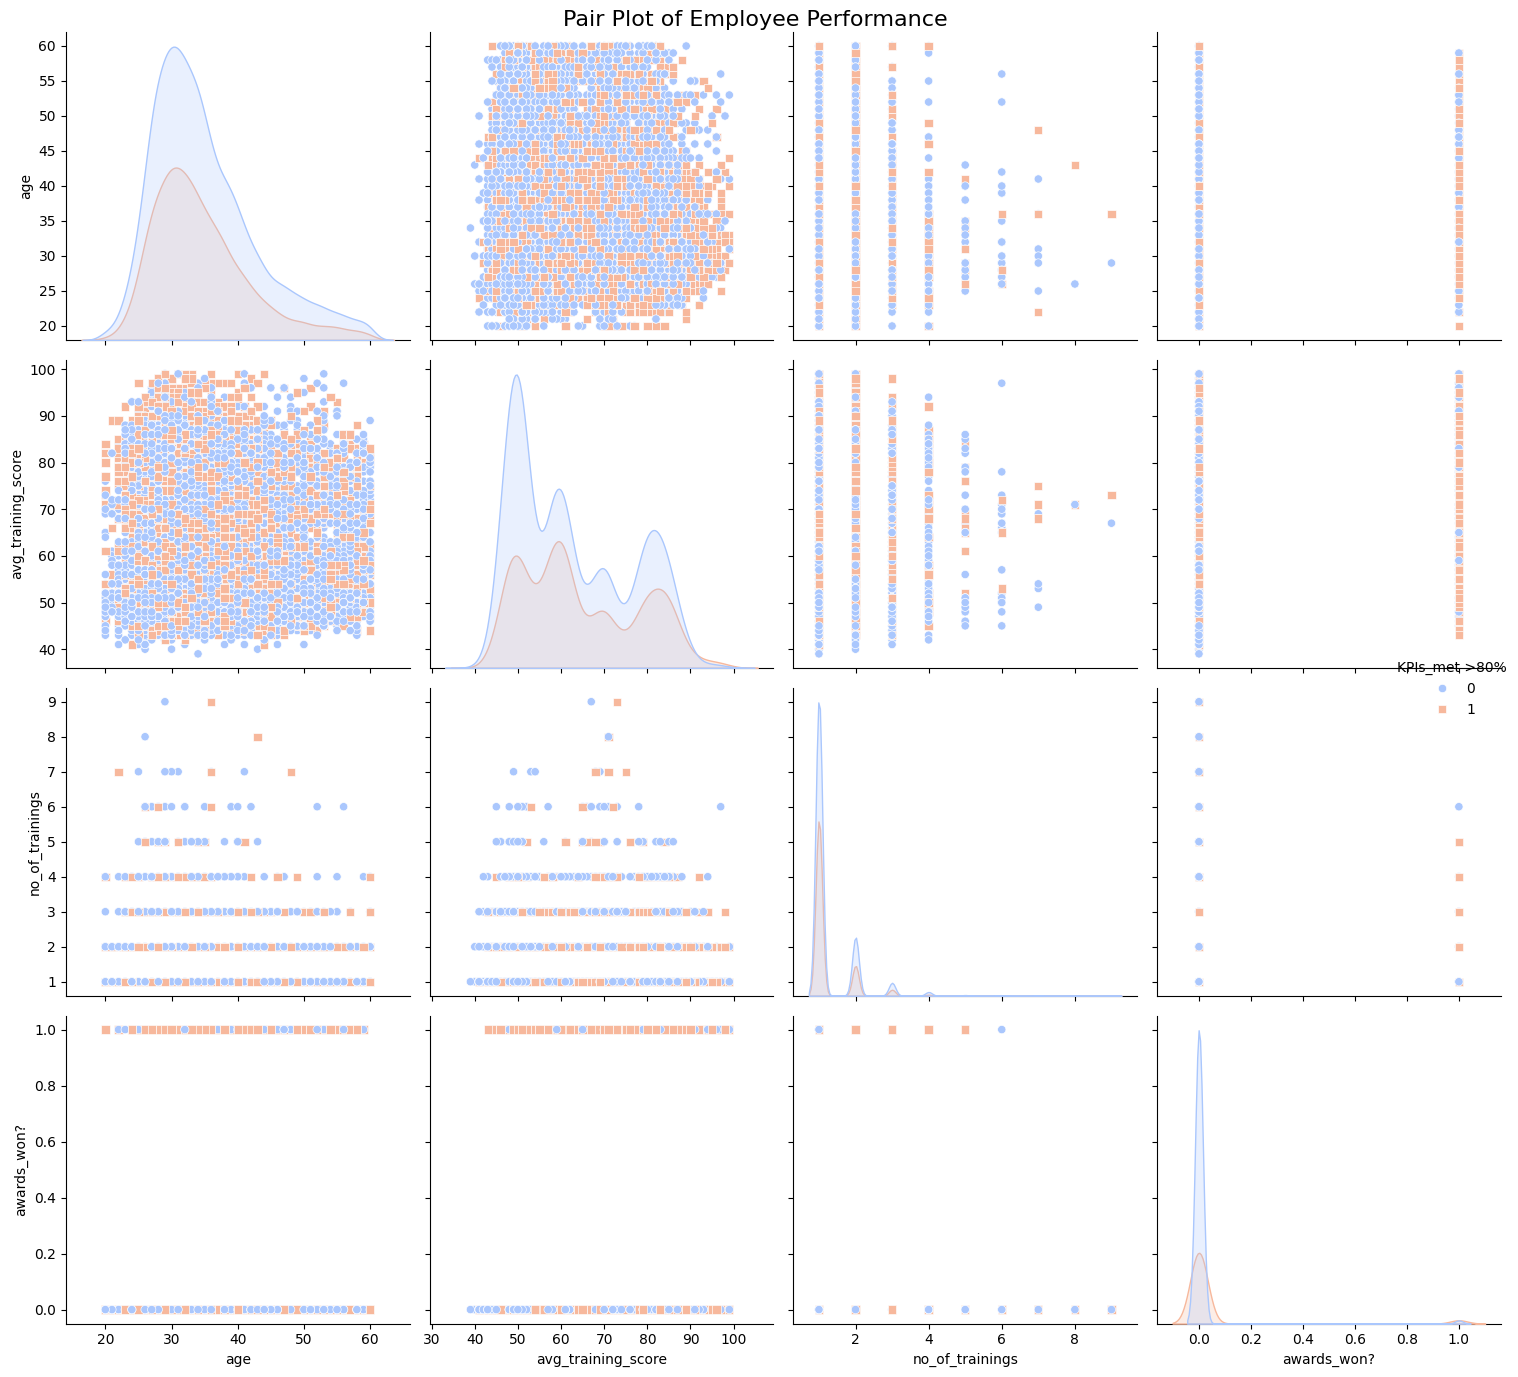

In [47]:
#Pair Plots
pair_plot_data = df[['age', 'avg_training_score', 'no_of_trainings', 'KPIs_met >80%', 'awards_won?']]

# Create the pair plot
sns.pairplot(pair_plot_data, hue='KPIs_met >80%', palette='coolwarm', markers=["o", "s"], height=3.5)

# Display the plot
plt.suptitle('Pair Plot of Employee Performance', fontsize=16)
plt.tight_layout()
plt.show()